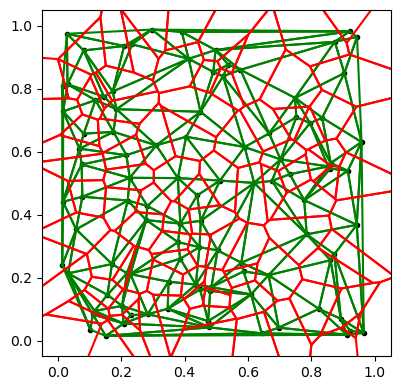

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def voronoi(P):
    delauny = Delaunay(P)
    triangles = delauny.points[delauny.simplices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='g')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delauny.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps /= np.linalg.norm(ps)
                di /= np.linalg.norm(di)

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments

def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

if __name__ == '__main__':
    P = np.random.random((100,2))

    X,Y = P[:,0],P[:,1]

    fig = plt.figure(figsize=(4.5,4.5))
    axes = plt.subplot(1,1,1)

    plt.scatter(X, Y, marker='.', color="black")
    plt.axis([-0.05,1.05,-0.05,1.05])

    segments = voronoi(P)
    lines = matplotlib.collections.LineCollection(segments, color='r')
    axes.add_collection(lines)
    plt.axis([-0.05,1.05,-0.05,1.05])
    plt.show()

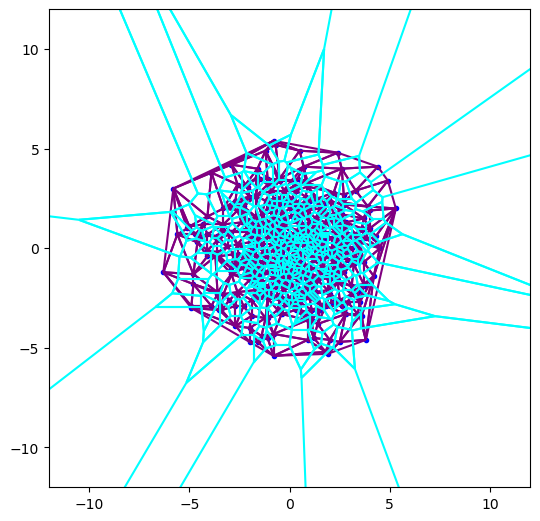

In [7]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def voronoi(P):
    delauny = Delaunay(P)
    triangles = delauny.points[delauny.simplices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='purple')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delauny.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps /= np.linalg.norm(ps)
                di /= np.linalg.norm(di)

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments

def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

if __name__ == '__main__':
    sc=4
    P = np.round_(np.random.normal(loc=0, scale=2, size=(500,2)), decimals=1, out=None)

    X,Y = P[:,0],P[:,1]

    fig = plt.figure(figsize=(9*sc,9*sc))
    axes = plt.subplot(5,5,5)

    plt.scatter(X, Y, marker='.', color="b")
    plt.axis([-3*sc,3*sc,-3*sc,3*sc])

    segments = voronoi(P)
    lines = matplotlib.collections.LineCollection(segments, color='cyan')
    axes.add_collection(lines)
    plt.axis([-3*sc,3*sc,-3*sc,3*sc])
    plt.show()

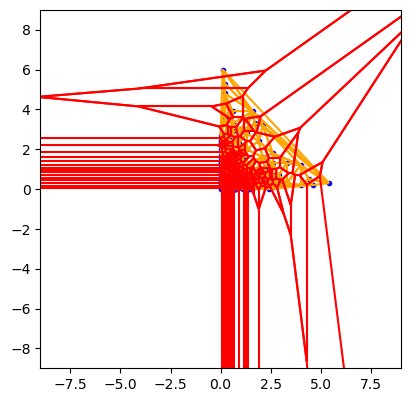

In [8]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def voronoi(P):
    delauny = Delaunay(P)
    triangles = delauny.points[delauny.simplices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='orange')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delauny.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps /= np.linalg.norm(ps)
                di /= np.linalg.norm(di)

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments

def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

if __name__ == '__main__':
    sc=3
    P = np.round_(np.random.exponential(scale=0.7, size=(500,2)), decimals=1, out=None)

    X,Y = P[:,0],P[:,1]

    fig = plt.figure(figsize=(9*sc,9*sc))
    axes = plt.subplot(5,5,5)

    plt.scatter(X, Y, marker='.', color="b")
    plt.axis([-3*sc,3*sc,-3*sc,3*sc])

    segments = voronoi(P)
    lines = matplotlib.collections.LineCollection(segments, color='red')
    axes.add_collection(lines)
    plt.axis([-3*sc,3*sc,-3*sc,3*sc])
    plt.show()

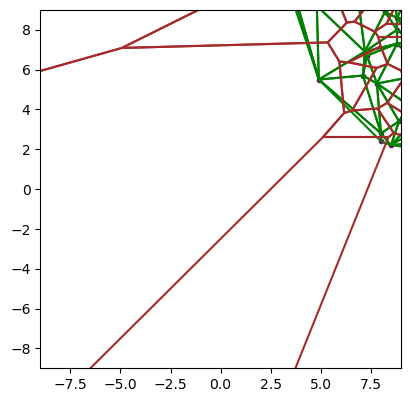

In [9]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def voronoi(P):
    delauny = Delaunay(P)
    triangles = delauny.points[delauny.simplices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='green')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delauny.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps /= np.linalg.norm(ps)
                di /= np.linalg.norm(di)

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments

def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

a, m = 3., 2.  # shape and mode
if __name__ == '__main__':
    sc=3
    P = np.round_(np.random.noncentral_chisquare(df=2, nonc= 17, size=(1500,2)), decimals=1, out=None)

    X,Y = P[:,0],P[:,1]

    fig = plt.figure(figsize=(9*sc,9*sc))
    axes = plt.subplot(5,5,5)

    plt.scatter(X, Y, marker='.', color="purple")
    plt.axis([-3*sc,3*sc,-3*sc,3*sc])

    segments = voronoi(P)
    lines = matplotlib.collections.LineCollection(segments, color='brown')
    axes.add_collection(lines)
    plt.axis([-3*sc,3*sc,-3*sc,3*sc])
    plt.show()

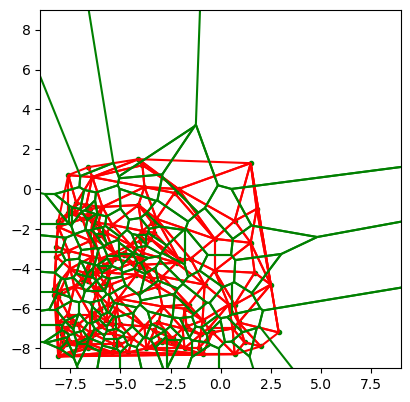

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def voronoi(P):
    delaunay = Delaunay(P)
    triangles = delaunay.points[delaunay.simplices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='red')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delaunay.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps_norm = np.linalg.norm(ps)
                di_norm = np.linalg.norm(di)

                if ps_norm > 0:
                    ps /= ps_norm
                if di_norm > 0:
                    di /= di_norm

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments

def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A, b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

if __name__ == '__main__':
    sc=3
    P = np.round_(np.random.triangular(left=-8.5, right=3, mode=-8, size=(150,2)), decimals=1, out=None)

    X, Y = P[:,0], P[:,1]

    fig = plt.figure(figsize=(9*sc, 9*sc))
    axes = plt.subplot(5, 5, 5)

    plt.scatter(X, Y, marker='.', color="green")
    plt.axis([-3*sc, 3*sc, -3*sc, 3*sc])

    segments = voronoi(P)
    lines = matplotlib.collections.LineCollection(segments, color='green')
    axes.add_collection(lines)
    plt.axis([-3*sc, 3*sc, -3*sc, 3*sc])
    plt.show()
